# Project Guideline

GROUP 6
ANGGOTA KELOMPOK :
1. Bardana Eka Nugraha_11124447_1KA08
2. Ahmad Ridwansyah_10124067_1KA07
3. Andhito Yudi Pratama_10124146_1KA08
4. Razzan Uqail_11124193_1KA07
5. Marvell Bill Armando_1KA06_10124712

<br>


## Data Understanding

Menjelajahi struktur dan karakteristik dari sebuah data.

Menulis kode untuk mengkoneksikan notebook ke Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Memasukkan library yang akan kamu gunakan

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


Mengambil file .csv dari Google Drive kamu.

In [6]:
data_url = 'https://raw.githubusercontent.com/bardanaazn/fikti-learning-2025/refs/heads/main/student_project/projects/group06/dataset/housing_data.csv'
df = pd.read_csv(data_url)

## Data Cleaning

Menangani nilai yang hilang, outlier, dan mempersiapkan variabel.

CEK MISSING VALUES

In [7]:
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


CEK DUPLIKASI DATA

In [8]:
df.duplicated().sum()

np.int64(0)

In [22]:
binary_cols = ['mainroad', 'guestroom', 'hotwaterheating', 'airconditioning', 'basement', 'prefarea']

for col in binary_cols:
    df[col] = df[col].apply(lambda x: 1 if x == 'yes' else 0)

In [21]:
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)

print("\nKolom 'furnishingstatus' sudah di-one-hot encoded.")


Kolom 'furnishingstatus' sudah di-one-hot encoded.


## Exploratory Data Analysis

Memvisualisasikan hubungan, distribusi data, dan lain sebagainya.

Visualisasi Distribusi Variabel Numerik:

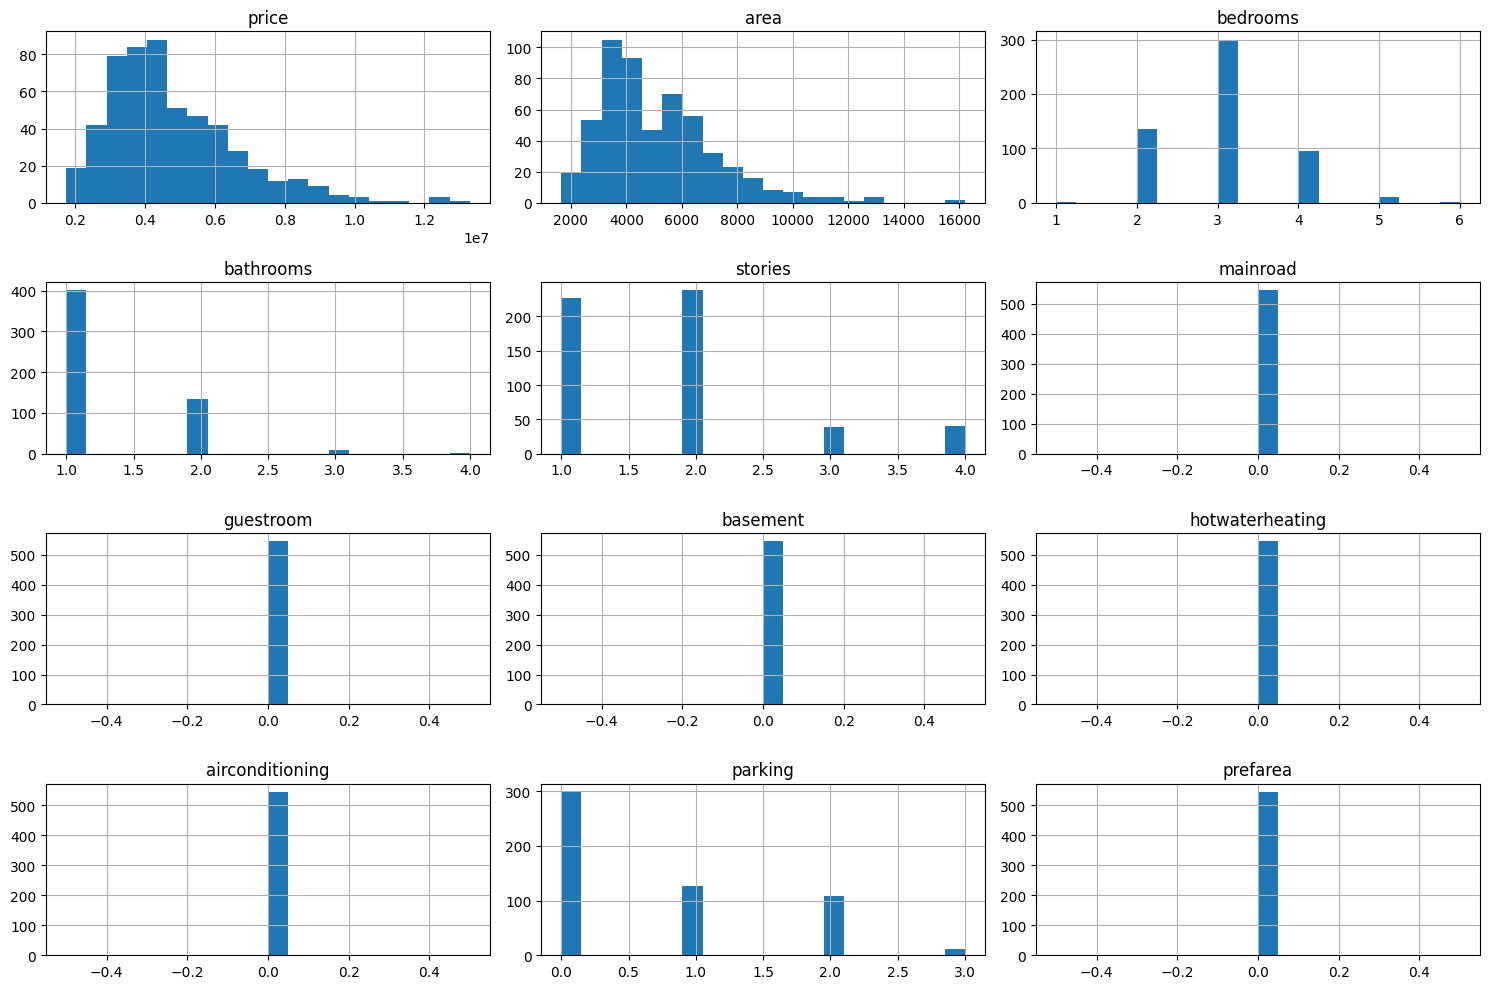

In [23]:
df.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

## Data Preparation

Memisahkan data training dan testing

In [24]:
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

CETAK DIMENSI

In [25]:
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of X_train: (436, 13)
Shape of X_test: (109, 13)
Shape of y_train: (436,)
Shape of y_test: (109,)


## Model Building

Membuat regresi linier pada. Silakan mengeksplorasi dataset kamu terlebih dahulu dengan berbagai kombinasi prediktor.

Membangun, melatih, untuk memprediksi harga

In [26]:
model = LinearRegression()

In [27]:
model.fit(X_train, y_train)

LinearRegression()

In [28]:
print(f'Koefisien model: {model.coef_}')
print(f'Intersep model: {model.intercept_}')

Koefisien model: [ 3.00828635e+02  1.44537714e+05  1.15490051e+06  4.64070182e+05
  6.98491931e-10  1.74622983e-10  0.00000000e+00  0.00000000e+00
  0.00000000e+00  2.94519572e+05  0.00000000e+00 -2.80890184e+05
 -6.86630267e+05]
Intersep model: 574070.660955687


In [29]:
y_pred = model.predict(X_test)

## Evaluation

Melakukan evaluasi model yang telah dibuat menggunakan plot dan metrik evaluasi, serta tambahkan interpretasi hasilnya.

In [34]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'R^2 Score: {r2:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')

R^2 Score: 0.5590
Mean Absolute Error (MAE): 1112059.1859
Mean Squared Error (MSE): 2229169358205.0586
Root Mean Squared Error (RMSE): 1493040.3070


Perbandingan antara harga aktual dan harga prediksi

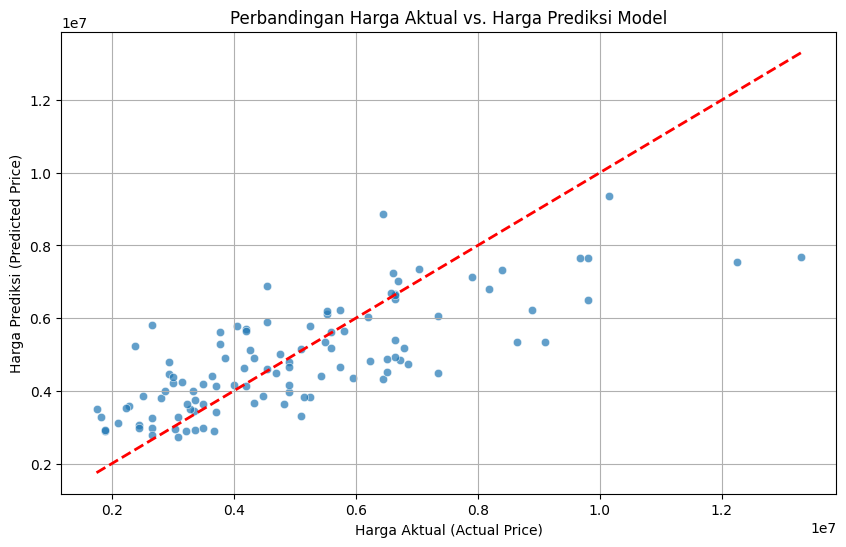

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

plt.xlabel('Harga Aktual (Actual Price)')
plt.ylabel('Harga Prediksi (Predicted Price)')
plt.title('Perbandingan Harga Aktual vs. Harga Prediksi Model')
plt.grid(True)
plt.show()